In [1]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
%matplotlib inline

In [2]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
# "../xywz.png" -> "xywz"
targets_orig = [x.split("/")[-1].split(".")[0] for x in image_files]
# separate the targets on character level
targets = [[char for char in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_encoder = preprocessing.LabelEncoder()
lbl_encoder.fit(targets_flat)
targets_enc = [lbl_encoder.transform(x) for x in targets]
# label encodes from 0, so add 1 to start from 1: 0 will be saved for unknown
targets_enc = np.array(targets_enc) + 1

# print(len(lbl_encoder.classes_))

train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = \
    model_selection.train_test_split(image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)

train_dataset = dataset.ClassificationDataset(image_paths=train_imgs, targets=train_targets,
                                              resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
    shuffle=True
)

test_dataset = dataset.ClassificationDataset(image_paths=test_imgs, targets=test_targets,
                                             resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
    shuffle=False
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


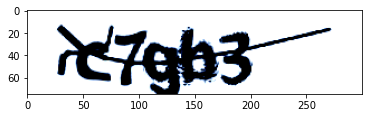

In [6]:
npimg = train_dataset[0]["images"].numpy()
plt.imshow(np.transpose(npimg, (1,2,0)))


